In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

#                                         🔎EDA🔍

###                                   🧽EXPLORACIÓN Y LIMPIEZA🧼
###                                       🧹🧹🧹🧹🧹🧹🧹🧹🧹🧹

#### ANÁLISIS CUSTOMER FLIGHT ACTIVITY🛫

In [84]:
df_flight = pd.read_csv("archivos/Customer Flight Activity.csv")

df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
5920,417904,2017,1,0,0,0,0,0.0,0,0
218807,951941,2018,1,0,0,0,0,0.0,0,0
293732,442525,2018,6,3,0,3,2244,224.0,0,0
328492,492496,2018,8,10,0,10,2850,285.0,0,0
395522,463606,2018,12,0,0,0,0,0.0,0,0
230043,649680,2018,2,0,0,0,0,0.0,0,0
320,117219,2017,1,5,0,5,2395,239.0,0,0
86534,162180,2017,10,13,7,20,3920,392.0,487,39
19096,139479,2018,6,0,0,0,0,0.0,0,0
311631,494536,2018,7,0,0,0,0,0.0,0,0


In [85]:
df_flight.info()# no tiene nulos , lo que tiene son muchas  filas sin datos(datos 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [86]:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [87]:
df_flight["Points Accumulated"].value_counts()

Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
658.50         1
556.25         1
10.80          1
565.50         1
626.00         1
Name: count, Length: 1549, dtype: int64

## Duplicados

In [88]:
df_flight.duplicated().sum()

1864

In [89]:
df_revisar = df_flight[df_flight.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number")

df_revisar.to_csv("Archivos/revisar.csv")



- **`index:`** El índice de la fila (es decir, la posición en el DataFrame).
- **`row:`** El contenido de la fila como un objeto pandas Series, donde cada valor de la fila es accesible por su nombre de columna.
- **`df_flight[df_flight.duplicated(keep=False)]:`** Muestra todas las filas duplicadas en el DataFrame.

- **`iterrows():`** Te permite recorrer cada fila duplicada para compararlas visualmente y detectar cualquier pequeña diferencia que cause que pandas las marque como duplicadas.


In [90]:
# Verificar qué diferencias hay entre las filas duplicadas
duplicados = df_flight[df_flight.duplicated(keep=False)]# con este False te enseña también  la original,no solo los duplicados

# Comparar fila por fila
for index, row in duplicados.iterrows():      

                                              
    print(f"Fila {index}: {row}")


Fila 41: Loyalty Number                 101902.0
Year                             2017.0
Month                               1.0
Flights Booked                      0.0
Flights with Companions             0.0
Total Flights                       0.0
Distance                            0.0
Points Accumulated                  0.0
Points Redeemed                     0.0
Dollar Cost Points Redeemed         0.0
Name: 41, dtype: float64
Fila 42: Loyalty Number                 101902.0
Year                             2017.0
Month                               1.0
Flights Booked                      0.0
Flights with Companions             0.0
Total Flights                       0.0
Distance                            0.0
Points Accumulated                  0.0
Points Redeemed                     0.0
Dollar Cost Points Redeemed         0.0
Name: 42, dtype: float64
Fila 226: Loyalty Number                 112142.0
Year                             2017.0
Month                               1.0
Fl

In [91]:
df_flight= df_flight.drop_duplicates(subset="Loyalty Number", keep="last")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
246,100504,2018,12,0,0,0,0,0.0,0,0
684,101709,2018,12,0,0,0,0,0.0,0,0
998,101876,2018,12,0,0,0,0,0.0,0,0
1332,105251,2018,12,0,0,0,0,0.0,0,0
1969,106509,2018,12,0,0,0,0,0.0,0,0


In [92]:
df_flight.duplicated().sum()

0

In [93]:
df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
398344,612122,2018,12,0,0,0,0,0.0,0,0
398311,610573,2018,12,16,7,23,2323,232.0,0,0
404626,947620,2018,12,1,1,2,2938,293.0,0,0
405026,967838,2018,12,0,0,0,0,0.0,0,0
390646,203084,2018,12,0,0,0,0,0.0,0,0
375296,286065,2018,11,7,0,7,1190,119.0,0,0
396559,516791,2018,12,0,0,0,0,0.0,0,0
401518,778393,2018,12,12,0,12,1452,145.0,0,0
399785,688058,2018,12,9,5,14,2744,274.0,0,0
396503,514451,2018,12,4,0,4,1424,142.0,0,0


## Nulos

In [94]:
df_flight.isnull().sum()# no tiene nulos, tiene muchas filas con valor 0 en todas sus columnas menos Loyalty Number; Year y Month

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

### ANÁLISIS CUSTOMER LOYALTY HISTORY🛬

In [105]:
df_loyalty = pd.read_csv("archivos/Customer Loyalty History.csv")
df_loyalty.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10427,299113,Canada,Quebec,Montreal,H2T 9K8,Male,College,NaN,Single,Star,2426.96,Standard,2013,6,NaN,NaN
1487,425687,Canada,Ontario,Toronto,P1J 8T7,Male,College,NaN,Single,Aurora,5880.26,Standard,2017,10,NaN,NaN
16116,567048,Canada,British Columbia,Vancouver,V6E 3Z3,Male,College,NaN,Married,Star,14944.84,Standard,2015,9,NaN,NaN
11768,824216,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,80861.0,Married,Star,2729.13,Standard,2018,6,NaN,NaN
2179,647933,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,79325.0,Married,Aurora,7582.11,Standard,2018,11,NaN,NaN
10196,360031,Canada,Ontario,Toronto,M8Y 4K8,Male,College,NaN,Married,Star,2357.50,Standard,2018,5,NaN,NaN
15071,271929,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,71411.0,Married,Star,8409.67,Standard,2016,12,NaN,NaN
16500,881413,Canada,Quebec,Montreal,H2Y 4R4,Female,College,NaN,Single,Star,23895.68,Standard,2013,7,NaN,NaN
8208,294617,Canada,Saskatchewan,Regina,S6J 3G0,Female,College,NaN,Married,Nova,8522.76,Standard,2012,8,NaN,NaN
9965,678514,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,NaN,Married,Star,2220.19,Standard,2012,10,NaN,NaN


In [106]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [107]:
df_loyalty.describe(include="O").T #columnas object

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [108]:
df_loyalty.describe().T  #columnas numéricas
#posibles valores negativos en la columna Salary. Errores?

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [109]:
df_loyalty["Salary"].value_counts() #con value.counts corroboramos que hay mas valores negativos de los  que vimos en el describe anterior valor de Salary en negativo, posible error. Cambiar a positivo?

Salary
 101933.0    23
 62283.0     14
 61809.0     14
 51573.0     14
 64001.0     13
             ..
 95907.0      1
 72440.0      1
 88633.0      1
 100572.0     1
-57297.0      1
Name: count, Length: 5890, dtype: int64

#### Limpieza

In [110]:
df_loyalty["Salary"]=df_loyalty["Salary"].abs()#cambiar numeros negativos de columna "Salary" a positivos


In [ ]:
df_loyalty["Salary"].value_counts()# vemos que el que era negativo arriba, ya no aparece como negativo

Salary
101933.0    23
62283.0     14
61809.0     14
51573.0     14
64001.0     13
            ..
95907.0      1
72440.0      1
88633.0      1
100572.0     1
57297.0      1
Name: count, Length: 5890, dtype: int64

####                              Nulos

In [112]:
df_loyalty.isnull().sum() / df_loyalty.shape[0]* 100 # comprobamos el porcentaje de nulos por columna

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

##### Hay 3 columnas con nulos.Vamos al DataFrame a mirar que se puede ver a simple vista. Hacemos varios sample para ver las 3 columnas. Vemos que en principio lo nulos de la columna "Salary" coinciden con con el valor "College" de la columna "Education". Vamos a ver como se comportan estos nulos .

In [ ]:
df_loyalty.groupby("Education")["Salary"].count().round(2)# en "collegue" no hay valores para "Salary"

Education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: Salary, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12360\606077412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Salary', data=df_loyalty, palette='viridis')


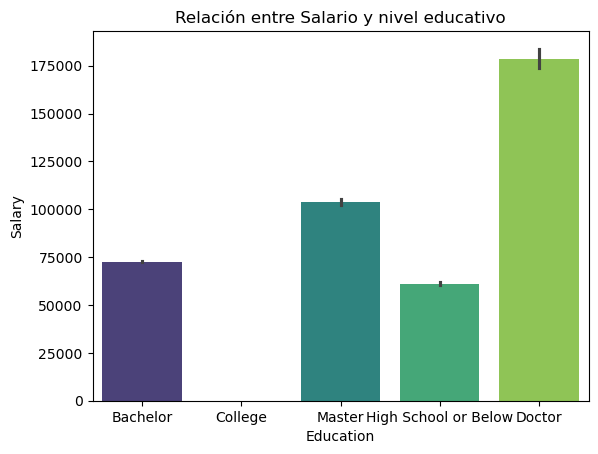

In [76]:

sns.barplot(x='Education', y='Salary', data=df_loyalty, palette='viridis')
plt.title("Relación entre Salario y nivel educativo")
plt.show();

In [77]:
media_high_bachelor = df_loyalty[df_loyalty['Education'].isin(['High Schooll or Below', 'Bachelor'])]['Salary'].mean().round(2)
df_loyalty[["Salary"]] = df_loyalty[["Salary"]].fillna(media_high_bachelor)

#Los nulos de "Salary" parecen acumularse en el nivel educativo de "College" .El nivel "college" se encuentra entre "High" y "Bachelor" , con lo que deducimos que su nivel salarial estará situado en la misma posición. Calculamos la media del salario de "High" y "Bachelor"  y se la imputamos a los valores nulos que tenemos en "Salary" para "College". Teniendo en cuenta que esto nos dará unos resultados aprox., no reales, cuando hagamos una consulta.

#Coinciden los nulos en las dos columnas( Cancelation Year y Cancelation Month), posible significado que la membresía no esté cancelada. Posible sustitución de nulos por Unknown o cualquier otro valor que signifique "no valorado".

In [78]:
df_loyalty[["Cancellation Month","Cancellation Year"]].isnull().sum()

Cancellation Month    14670
Cancellation Year     14670
dtype: int64

In [79]:
import pandas as pd

def limpiar_columnas(df, columns):
        
    for column in columns :   
   
        # Reemplazar comas
        df[column] = df[column].replace(',', '', regex=True)
        
        # Convertir a numérico y colocar NaN para valores no válidos
        df[column] = pd.to_numeric(df[column], errors='coerce')# errors='coerce': Si encuentra un valor no convertible, lo reemplaza por NaN (Not a Number)

        
        # Rellenar NaN con el valor especificado 
        df[column] = df[column].fillna(0).astype("int64")
    
    return df


lista_columnas = ["Cancellation Year", "Cancellation Month"]

# Aplicar la función
df_loyalty = limpiar_columnas(df_loyalty, lista_columnas)

# Ver el DataFrame resultante
display(df_loyalty.head(2))


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,0,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,72577.25,Divorced,Star,3839.61,Standard,2016,3,0,0


In [80]:
#Creamos una nueva columna con los clientes que siguen en activo con los datos que tenemos en la columna "cancellation Year"

df_loyalty["Active Status"] = df_loyalty['Cancellation Year'].apply(lambda x: 'Inactive' if x != 0 else 'Active')

display(df_loyalty.head(2))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Active Status
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,0,0,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,72577.25,Divorced,Star,3839.61,Standard,2016,3,0,0,Active


#### Duplicados

In [103]:
duplicados_loy=df_loyalty.duplicated().sum()
print(f"df_loyalty tiene {duplicados_loy} duplicados")

df_loyalty tiene 0 duplicados


### UNIÓN TABLAS

In [95]:
df_union = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='left')

In [99]:
df_union.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Active Status
14134,845807,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P5S 6R4,Female,College,72577.25,Single,Nova,14703.13,Standard,2014,11,0,0,Active
9460,567670,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,26922.00,Divorced,Star,5290.67,2018 Promotion,2018,4,0,0,Active
3937,220538,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,48042.00,Divorced,Star,2548.39,Standard,2017,12,0,0,Active
16398,979010,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,54918.00,Married,Nova,4868.81,Standard,2013,3,0,0,Active
7782,464248,2018,12,1,0,1,437,43.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,98969.00,Married,Nova,2968.08,Standard,2014,6,0,0,Active
979,865654,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,College,72577.25,Single,Star,3853.47,Standard,2016,5,2017,7,Inactive
909,821944,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,85265.00,Married,Star,5038.98,Standard,2016,12,2017,8,Inactive
1692,272001,2018,12,17,5,22,1738,173.0,747,60,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,50254.00,Married,Nova,13248.64,Standard,2012,9,0,0,Active
11458,688533,2018,12,13,0,13,4589,458.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Doctor,67855.00,Married,Nova,18635.90,Standard,2014,6,0,0,Active
9167,550303,2018,12,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,87603.00,Married,Nova,3548.15,Standard,2013,4,2013,11,Inactive


In [100]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Year                         16737 non-null  int64  
 2   Month                        16737 non-null  int64  
 3   Flights Booked               16737 non-null  int64  
 4   Flights with Companions      16737 non-null  int64  
 5   Total Flights                16737 non-null  int64  
 6   Distance                     16737 non-null  int64  
 7   Points Accumulated           16737 non-null  float64
 8   Points Redeemed              16737 non-null  int64  
 9   Dollar Cost Points Redeemed  16737 non-null  int64  
 10  Country                      16737 non-null  object 
 11  Province                     16737 non-null  object 
 12  City                         16737 non-null  object 
 13  Postal Code     

###     📊📊📊📊 👓 VISUALIZACIÓN👓📊📊📊📊
                                        

#### ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?